# Problem statement

Financial threats are displaying a trend about the credit risk of commercial banks as the incredible improvement in the financial industry has arisen. In this way, one of the biggest threats faces by commercial banks is the risk prediction of credit clients. The goal is to predict the probability of credit default based on credit card owner's characteristics and payment history.

# Importing required libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import  KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV,KFold, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import GridSearchCV

ModuleNotFoundError: No module named 'pandas'

In [2]:
##importing dataset
df=pd.read_csv(r"C:\Users\Antima\Downloads\archive (5)\UCI_Credit_Card.csv",delimiter=',')

In [3]:
##showing first five rows of the data
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
##s howing last five rows of data
df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1
29999,30000,50000.0,1,2,1,46,0,0,0,0,...,36535.0,32428.0,15313.0,2078.0,1800.0,1430.0,1000.0,1000.0,1000.0,1


In [5]:
## changing name of 'default.payment.next.month' column
df.rename(columns={'default.payment.next.month':'default_pay'}, inplace=True)

In [6]:
## changing name of column 'PAY_0'
df.rename(columns={'PAY_0':'PAY_1'}, inplace=True)

In [7]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_pay
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [8]:
##shape of data
df.shape

(30000, 25)

In [9]:
##info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           30000 non-null  int64  
 1   LIMIT_BAL    30000 non-null  float64
 2   SEX          30000 non-null  int64  
 3   EDUCATION    30000 non-null  int64  
 4   MARRIAGE     30000 non-null  int64  
 5   AGE          30000 non-null  int64  
 6   PAY_1        30000 non-null  int64  
 7   PAY_2        30000 non-null  int64  
 8   PAY_3        30000 non-null  int64  
 9   PAY_4        30000 non-null  int64  
 10  PAY_5        30000 non-null  int64  
 11  PAY_6        30000 non-null  int64  
 12  BILL_AMT1    30000 non-null  float64
 13  BILL_AMT2    30000 non-null  float64
 14  BILL_AMT3    30000 non-null  float64
 15  BILL_AMT4    30000 non-null  float64
 16  BILL_AMT5    30000 non-null  float64
 17  BILL_AMT6    30000 non-null  float64
 18  PAY_AMT1     30000 non-null  float64
 19  PAY_

In [10]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_pay
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [11]:
## checking for missing values
df.isna().sum()

ID             0
LIMIT_BAL      0
SEX            0
EDUCATION      0
MARRIAGE       0
AGE            0
PAY_1          0
PAY_2          0
PAY_3          0
PAY_4          0
PAY_5          0
PAY_6          0
BILL_AMT1      0
BILL_AMT2      0
BILL_AMT3      0
BILL_AMT4      0
BILL_AMT5      0
BILL_AMT6      0
PAY_AMT1       0
PAY_AMT2       0
PAY_AMT3       0
PAY_AMT4       0
PAY_AMT5       0
PAY_AMT6       0
default_pay    0
dtype: int64

no missing value hence no imputation, now we directly move towards visualzation of dataset

# Univariate EDA

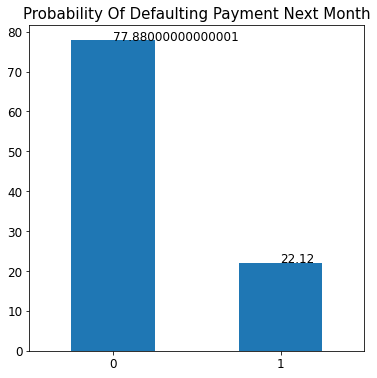

In [12]:
def_cnt = (df['default_pay'].value_counts(normalize=True)*100)
def_cnt.plot.bar(figsize=(6,6))
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title("Probability Of Defaulting Payment Next Month", fontsize=15)
for x,y in zip([0,1],def_cnt):
    plt.text(x,y,y,fontsize=12)
plt.show()

We can see that the dataset consists of 77% clients  who are not expected to do default payment whereas 23% clients are 
expected to default the payment.

In [13]:
def Univariate_analysis(data):
    for col in data:
        print(col)
        print('Skew :',round(data[col].skew(), 2))
        print("----------------------------------------------------------------------------")
        plt.figure(figsize = (15, 4))
        plt.subplot(1, 2, 1)
        df[col].hist(grid=False)
        plt.ylabel('count')
        plt.subplot(1, 2, 2)
        sns.boxplot(x=data[col])
        plt.show()

ID
Skew : 0.0
----------------------------------------------------------------------------


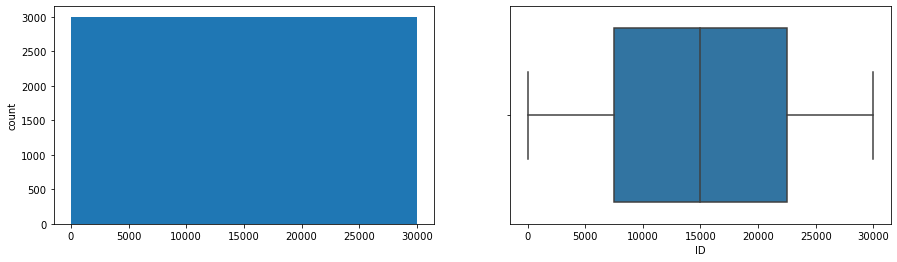

LIMIT_BAL
Skew : 0.99
----------------------------------------------------------------------------


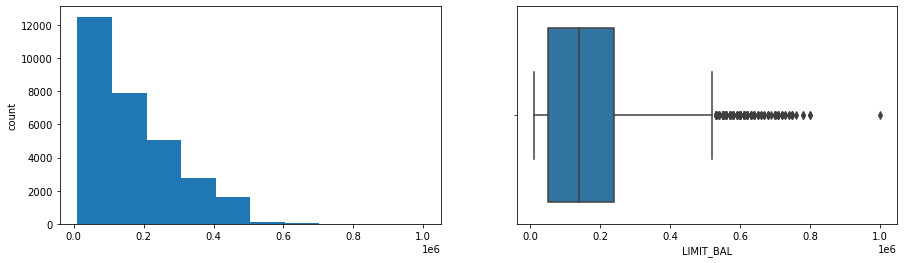

SEX
Skew : -0.42
----------------------------------------------------------------------------


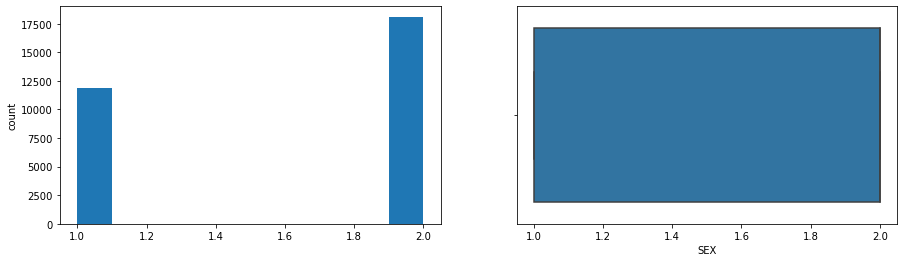

EDUCATION
Skew : 0.97
----------------------------------------------------------------------------


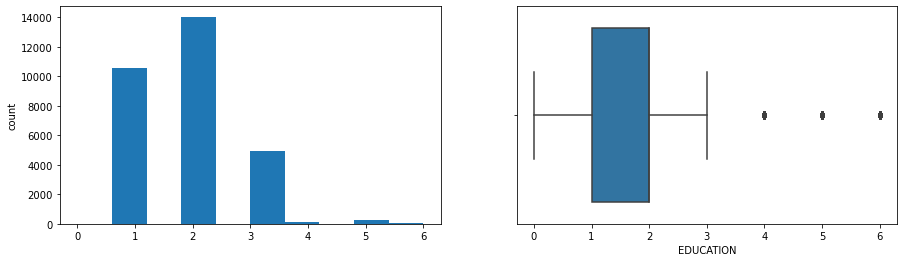

MARRIAGE
Skew : -0.02
----------------------------------------------------------------------------


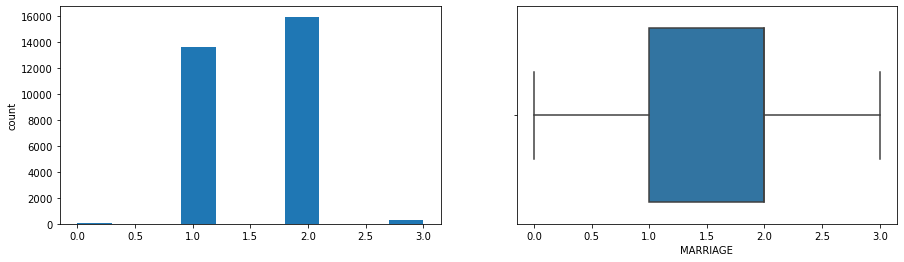

AGE
Skew : 0.73
----------------------------------------------------------------------------


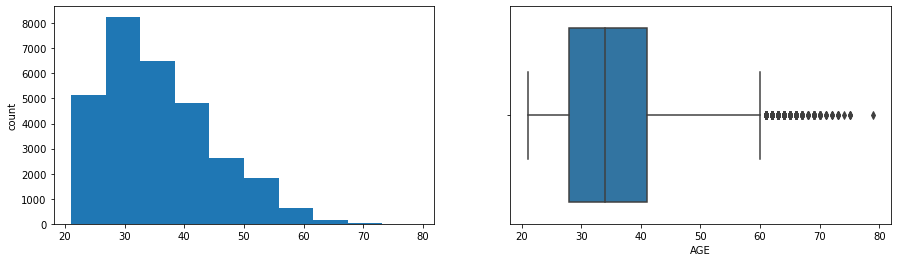

PAY_1
Skew : 0.73
----------------------------------------------------------------------------


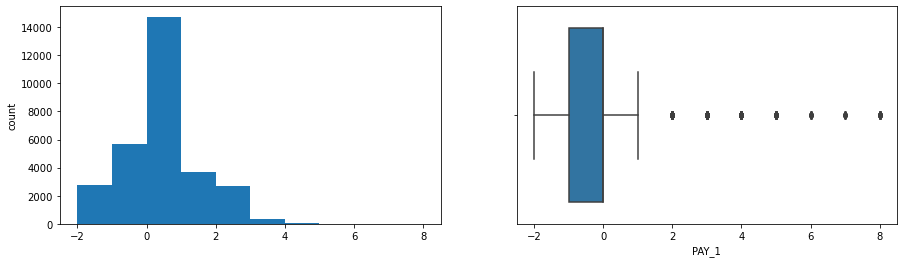

PAY_2
Skew : 0.79
----------------------------------------------------------------------------


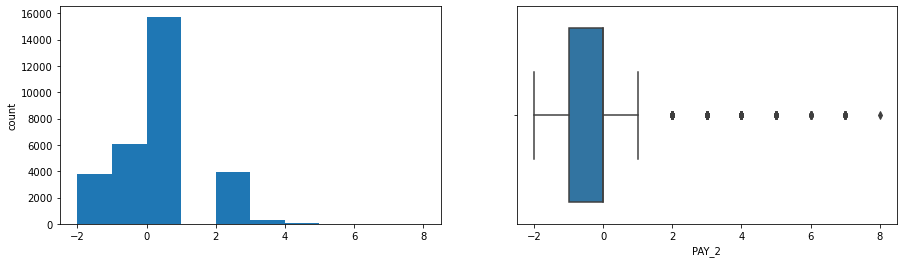

PAY_3
Skew : 0.84
----------------------------------------------------------------------------


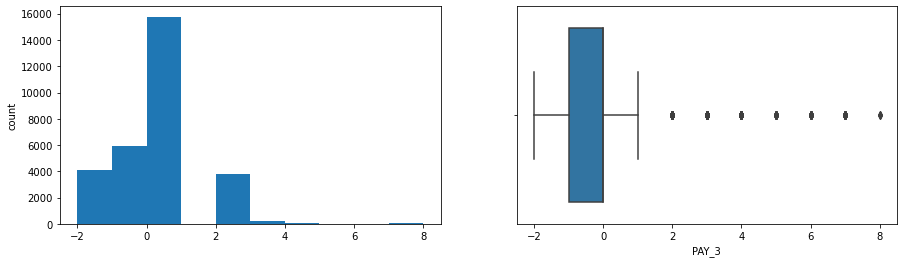

PAY_4
Skew : 1.0
----------------------------------------------------------------------------


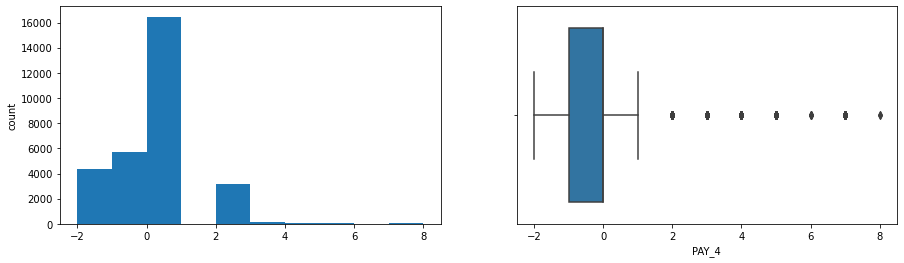

PAY_5
Skew : 1.01
----------------------------------------------------------------------------


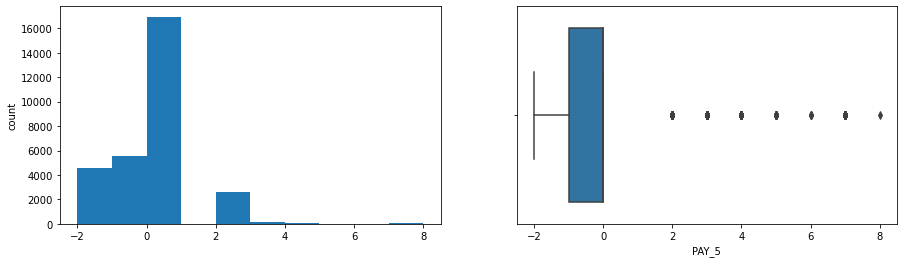

PAY_6
Skew : 0.95
----------------------------------------------------------------------------


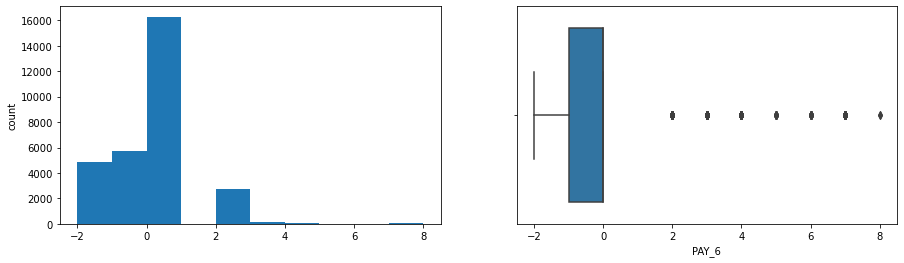

BILL_AMT1
Skew : 2.66
----------------------------------------------------------------------------


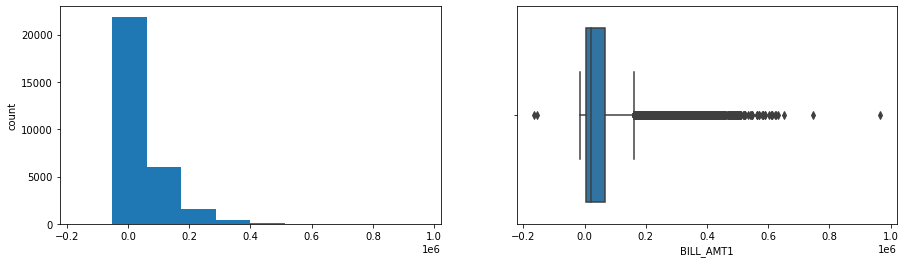

BILL_AMT2
Skew : 2.71
----------------------------------------------------------------------------


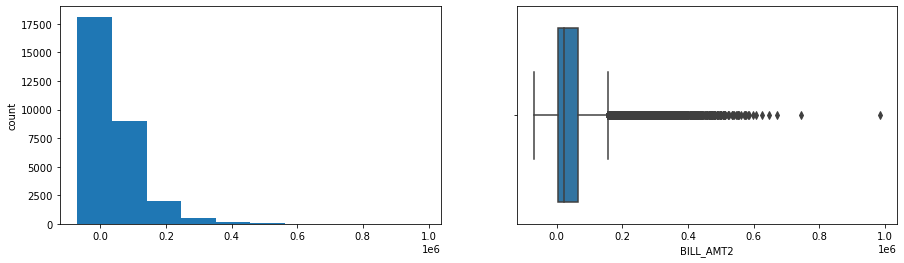

BILL_AMT3
Skew : 3.09
----------------------------------------------------------------------------


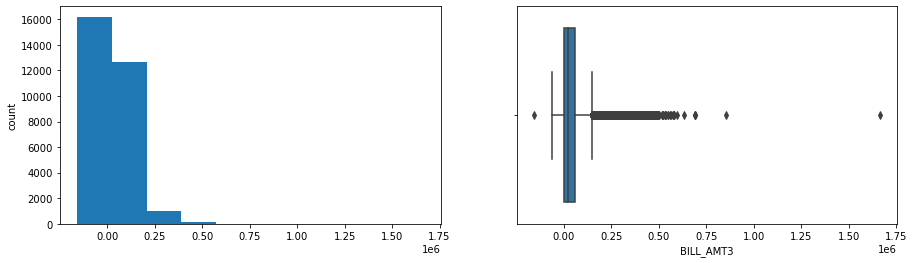

BILL_AMT4
Skew : 2.82
----------------------------------------------------------------------------


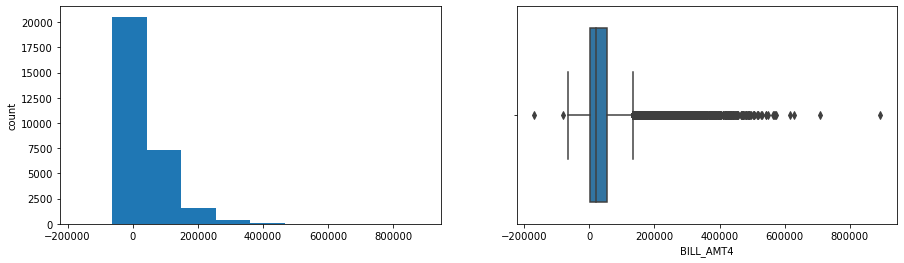

BILL_AMT5
Skew : 2.88
----------------------------------------------------------------------------


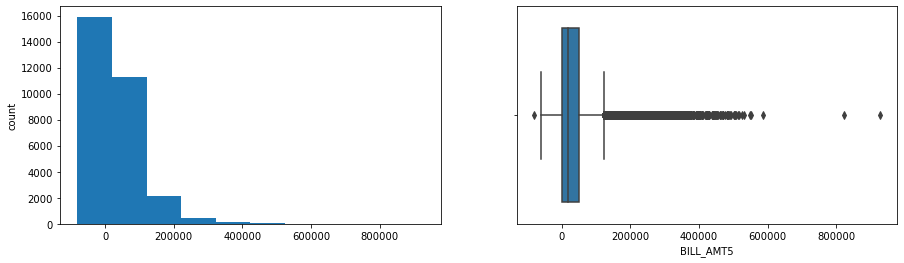

BILL_AMT6
Skew : 2.85
----------------------------------------------------------------------------


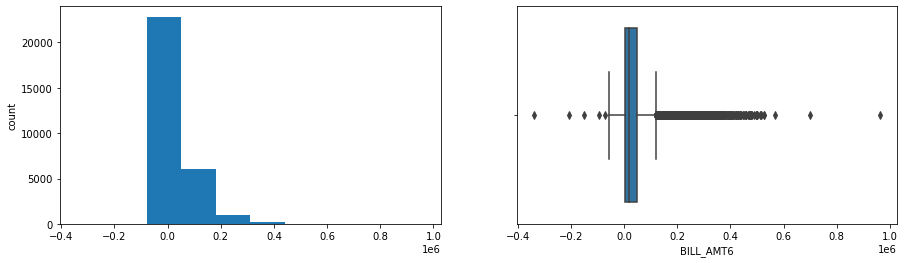

PAY_AMT1
Skew : 14.67
----------------------------------------------------------------------------


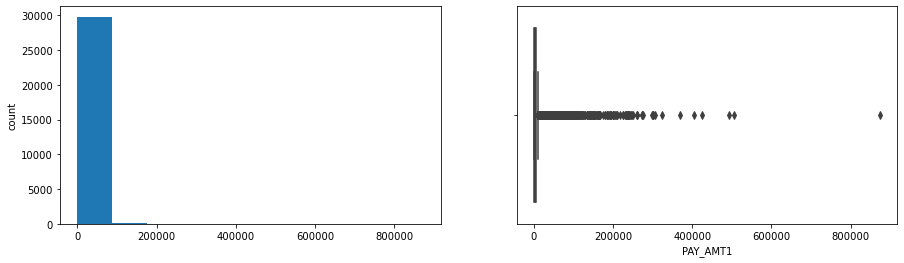

PAY_AMT2
Skew : 30.45
----------------------------------------------------------------------------


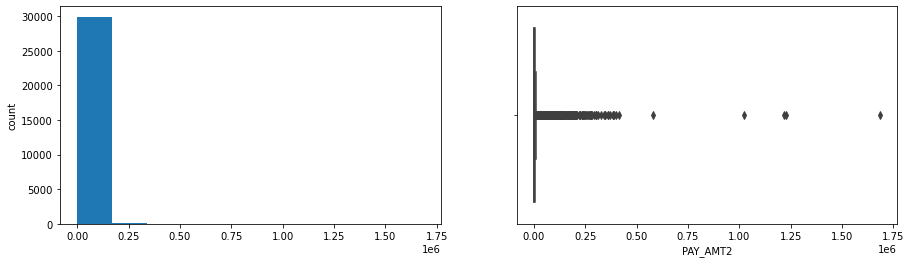

PAY_AMT3
Skew : 17.22
----------------------------------------------------------------------------


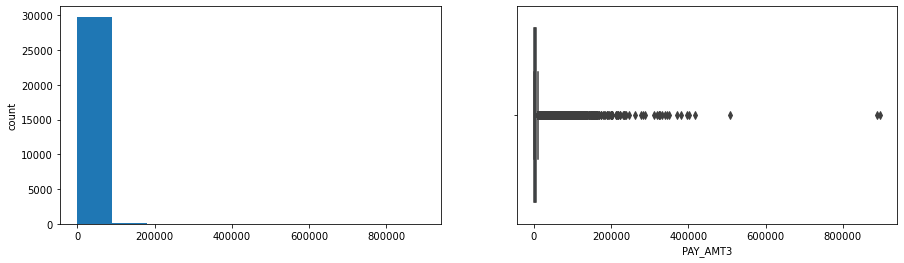

PAY_AMT4
Skew : 12.9
----------------------------------------------------------------------------


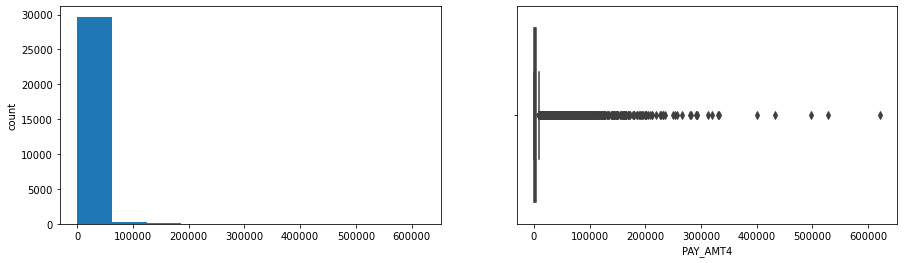

PAY_AMT5
Skew : 11.13
----------------------------------------------------------------------------


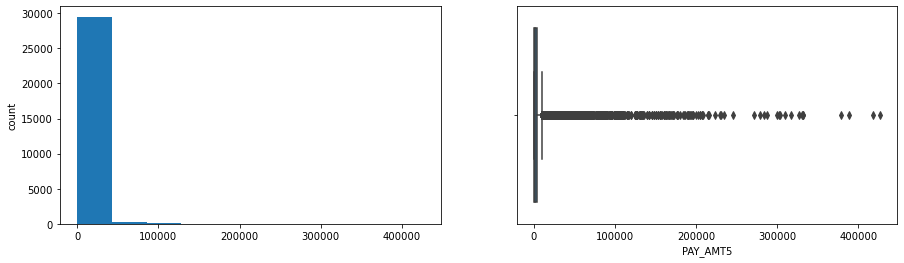

PAY_AMT6
Skew : 10.64
----------------------------------------------------------------------------


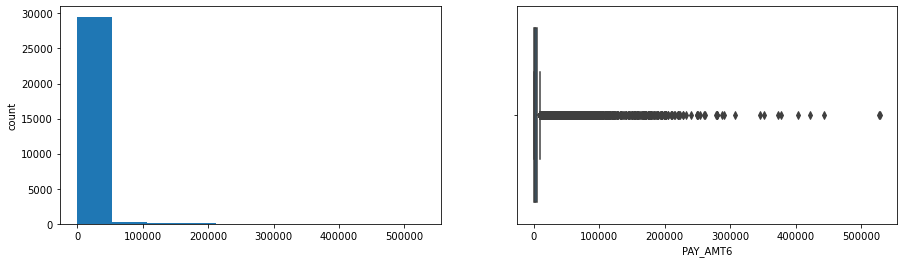

default_pay
Skew : 1.34
----------------------------------------------------------------------------


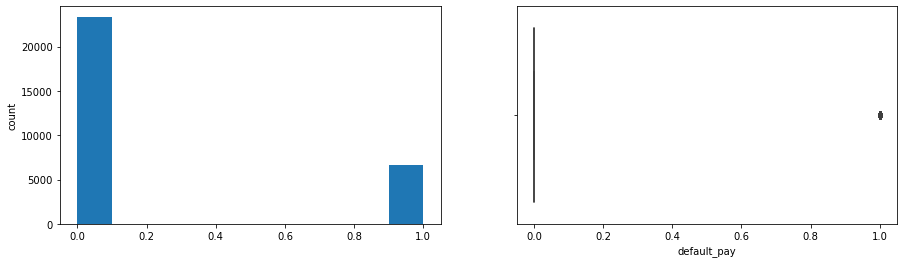

In [14]:
Univariate_analysis(df)

ID
Skew : 0.0


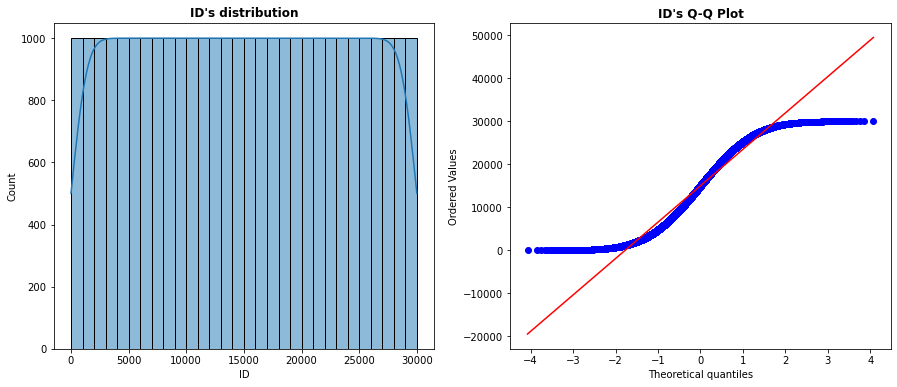

LIMIT_BAL
Skew : 0.99


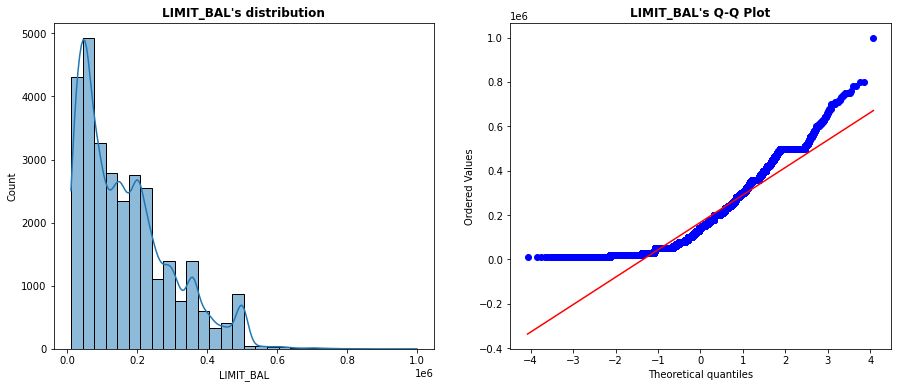

SEX
Skew : -0.42


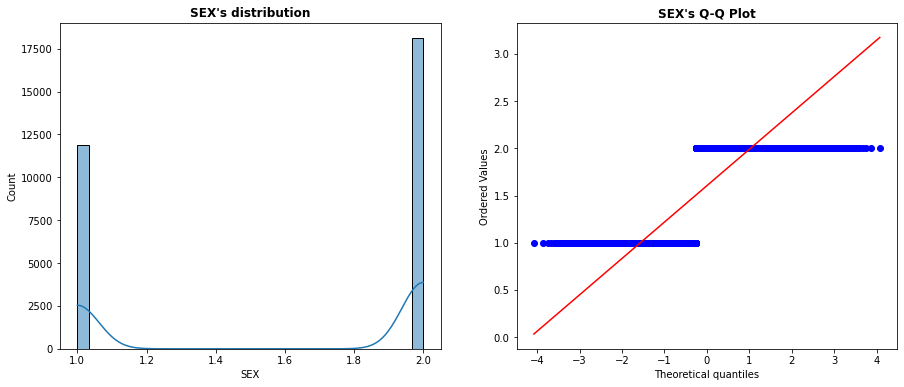

EDUCATION
Skew : 0.97


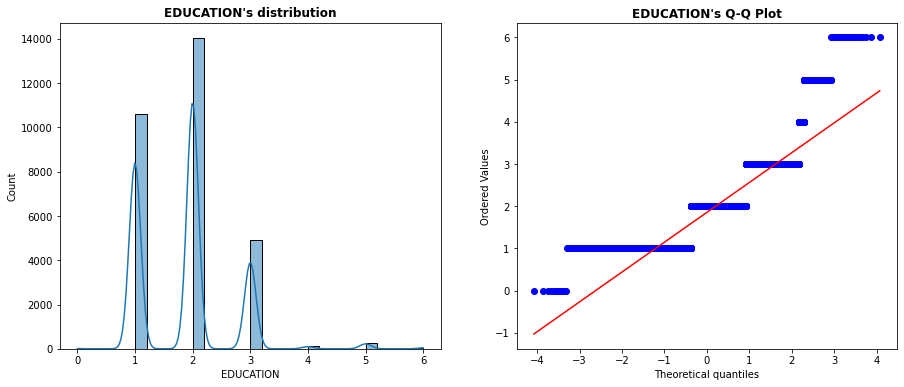

MARRIAGE
Skew : -0.02


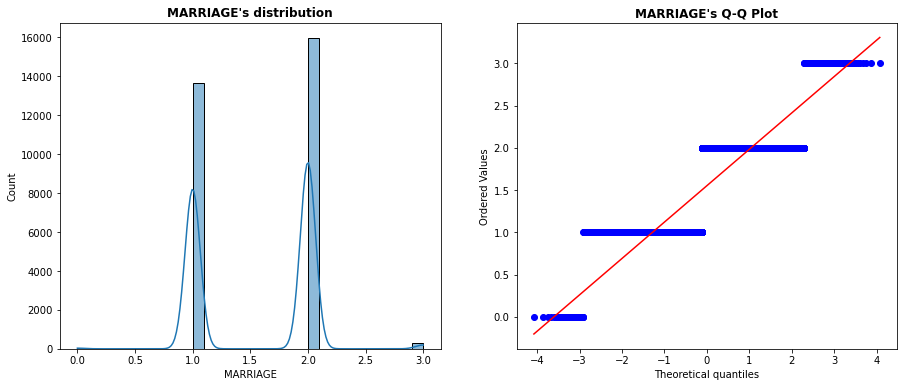

AGE
Skew : 0.73


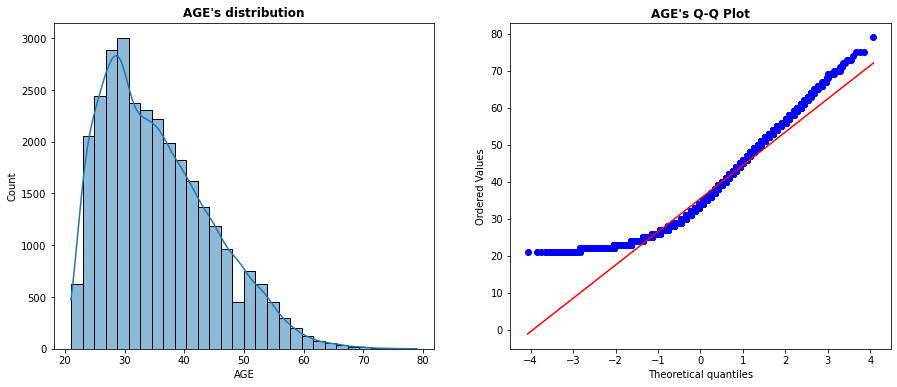

PAY_1
Skew : 0.73


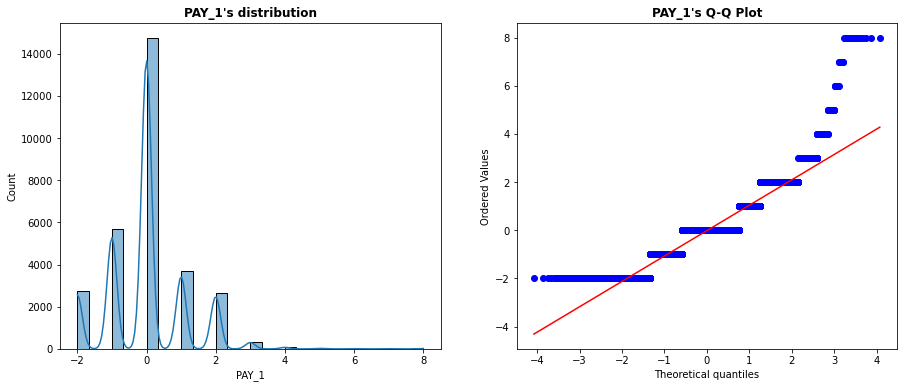

PAY_2
Skew : 0.79


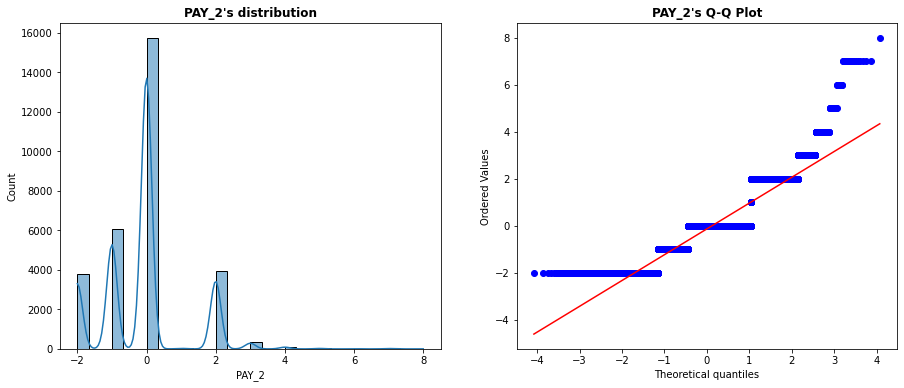

PAY_3
Skew : 0.84


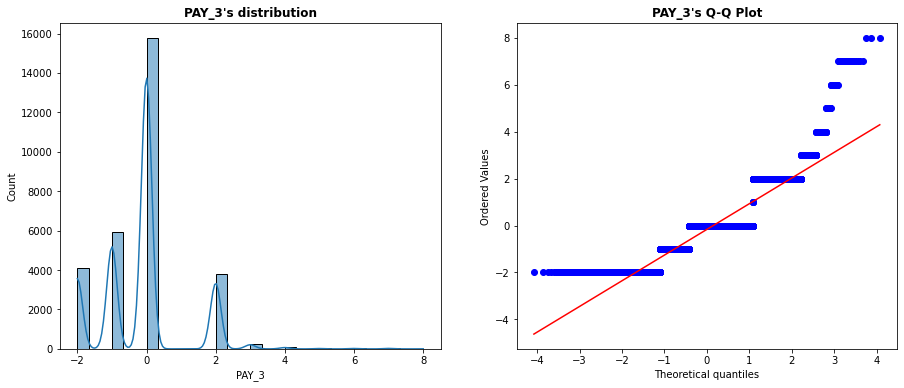

PAY_4
Skew : 1.0


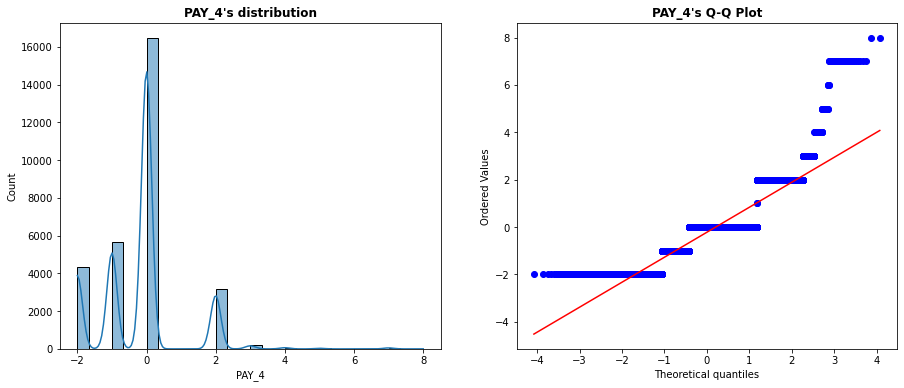

PAY_5
Skew : 1.01


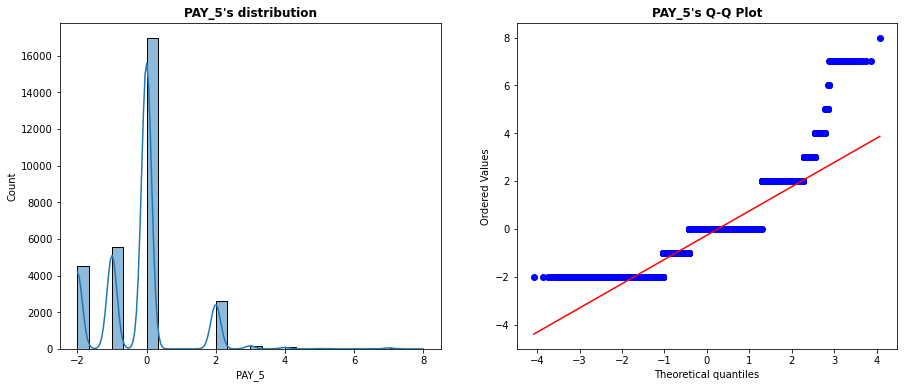

PAY_6
Skew : 0.95


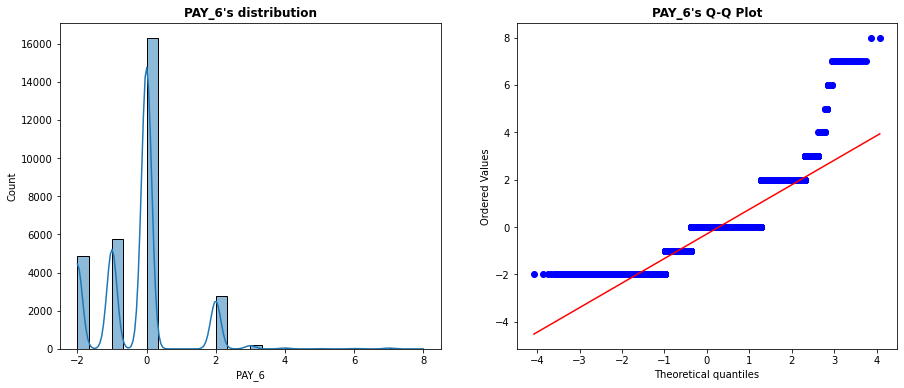

BILL_AMT1
Skew : 2.66


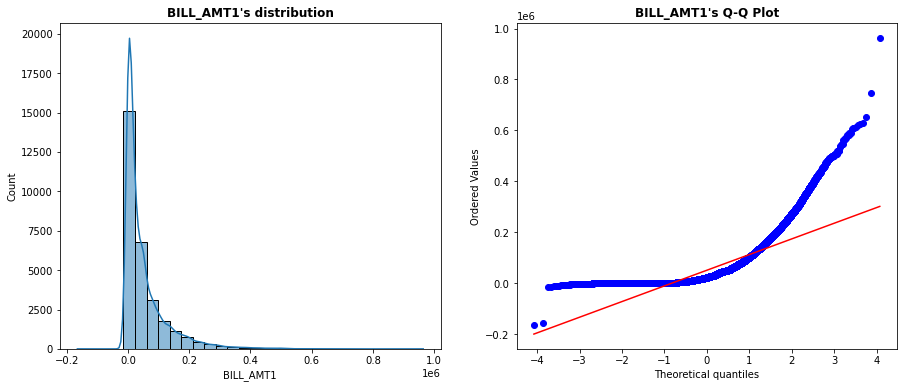

BILL_AMT2
Skew : 2.71


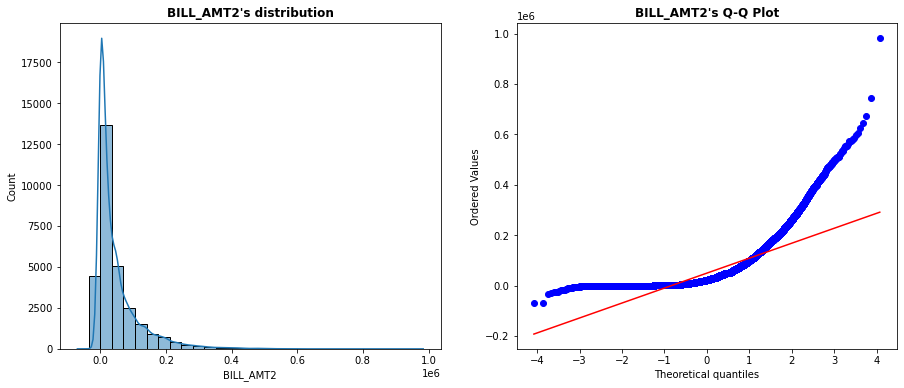

BILL_AMT3
Skew : 3.09


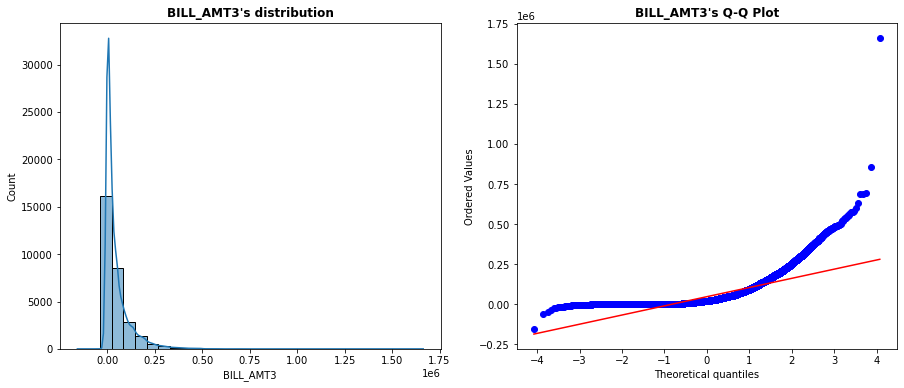

BILL_AMT4
Skew : 2.82


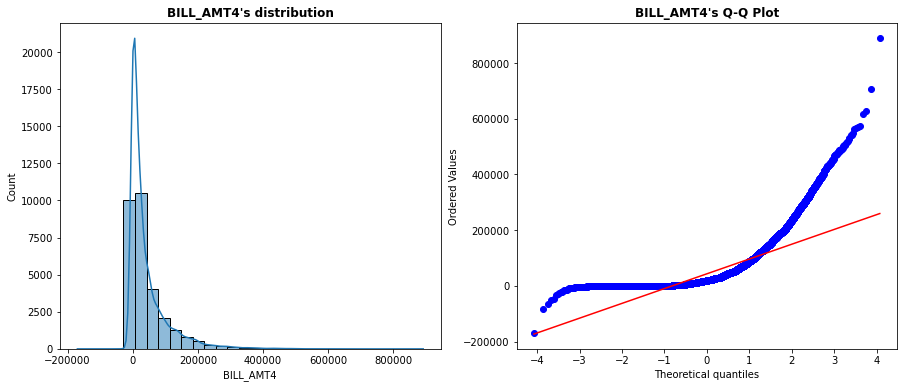

BILL_AMT5
Skew : 2.88


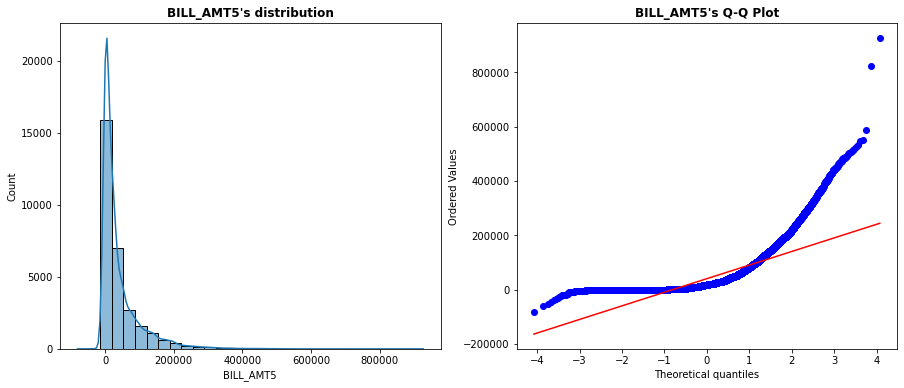

BILL_AMT6
Skew : 2.85


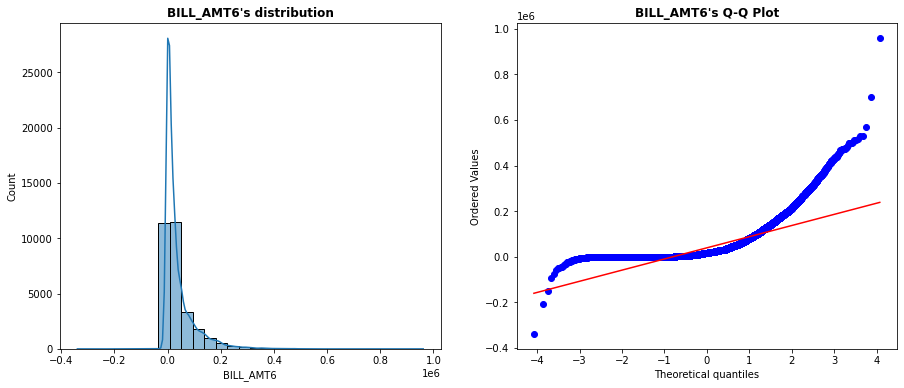

PAY_AMT1
Skew : 14.67


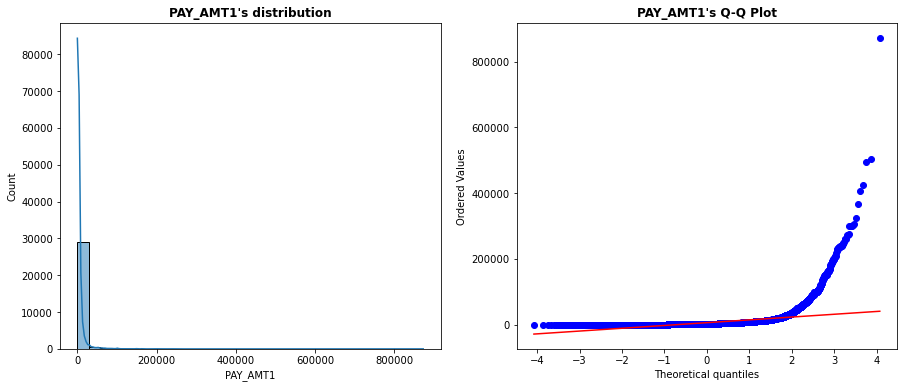

PAY_AMT2
Skew : 30.45


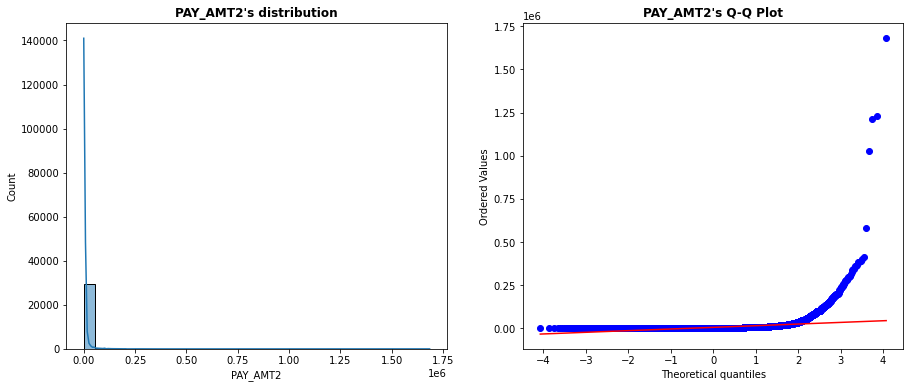

PAY_AMT3
Skew : 17.22


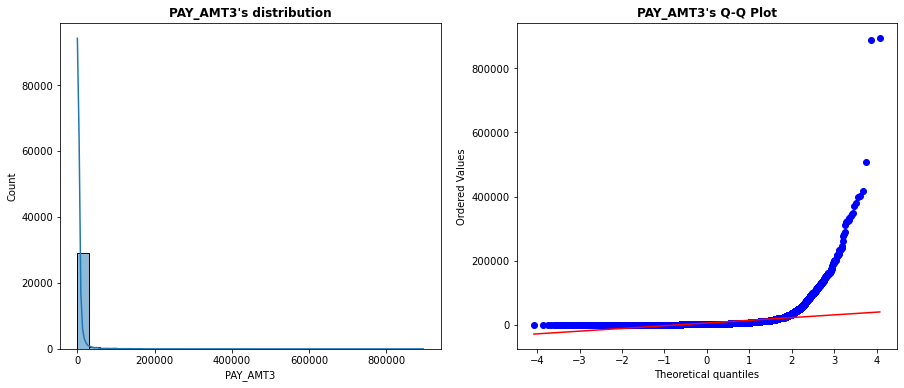

PAY_AMT4
Skew : 12.9


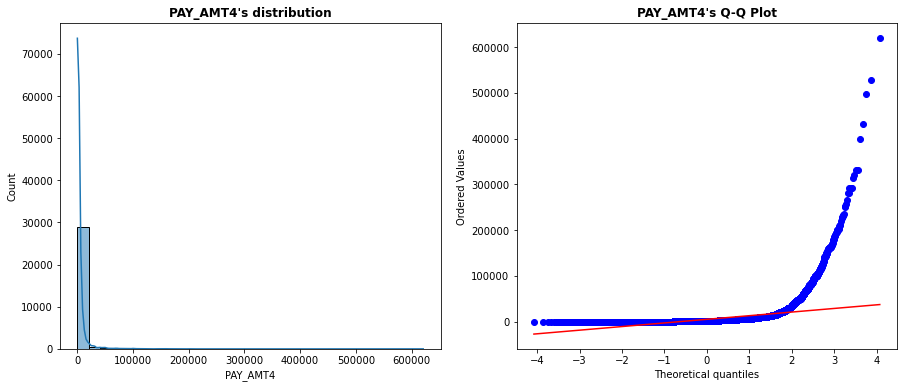

PAY_AMT5
Skew : 11.13


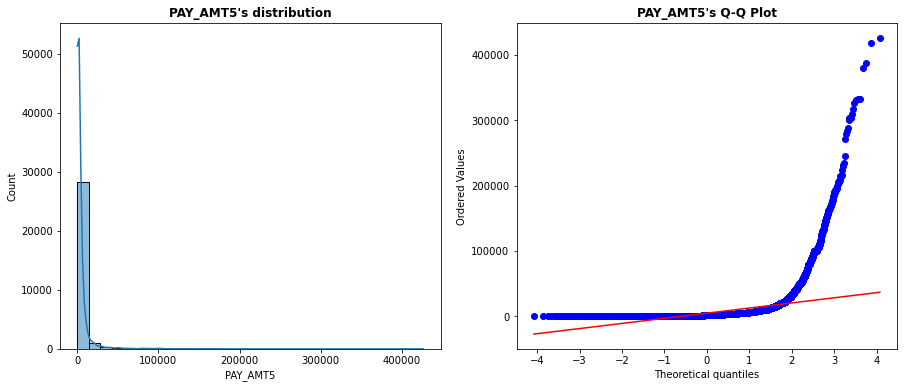

PAY_AMT6
Skew : 10.64


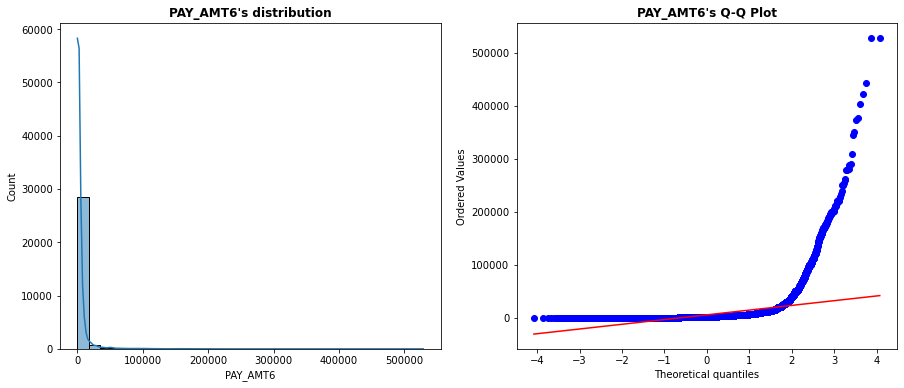

default_pay
Skew : 1.34


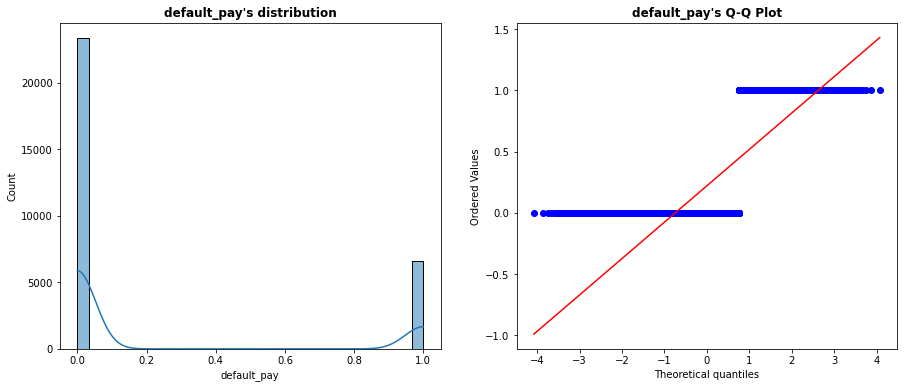

In [15]:
### For Q-Q Plot
import scipy.stats as stats

### Checking distribution of  numerical column
for i in df:
    print(i)
    print('Skew :', round(df[i].skew(), 2))
    plt.figure(figsize=(15,6))
    plt.subplot(121)
    sns.histplot(data=df, x=i, kde=True, bins=30)
    plt.title("{}'s distribution".format(i),fontweight="bold")
 
    plt.subplot(122)
    stats.probplot(df[i], dist='norm', plot=plt)
    plt.title("{}'s Q-Q Plot".format(i),fontweight="bold")
    plt.show();

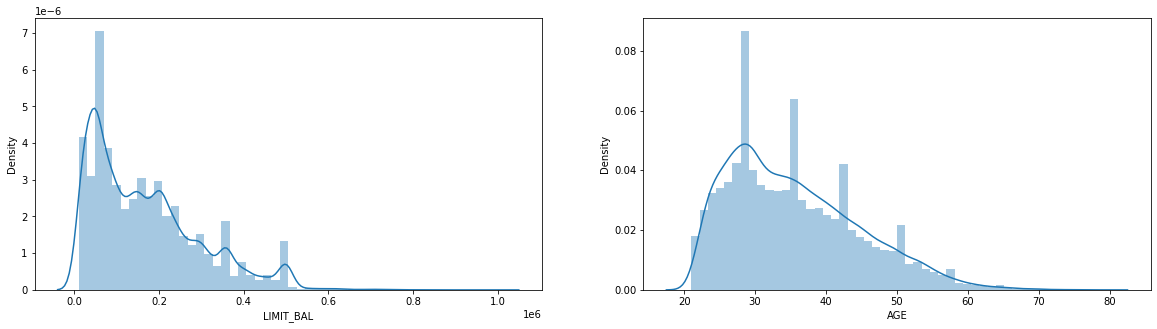

<Figure size 432x288 with 0 Axes>

In [16]:
##Distplot
plt.subplots(figsize=(20,5))
plt.subplot(121)
sns.distplot(df.LIMIT_BAL)

plt.subplot(122)
sns.distplot(df.AGE)
plt.show()
plt.tight_layout()

By plotting the continous variables we observe that dataset consists of skewed data of limiting balance and age of clients.

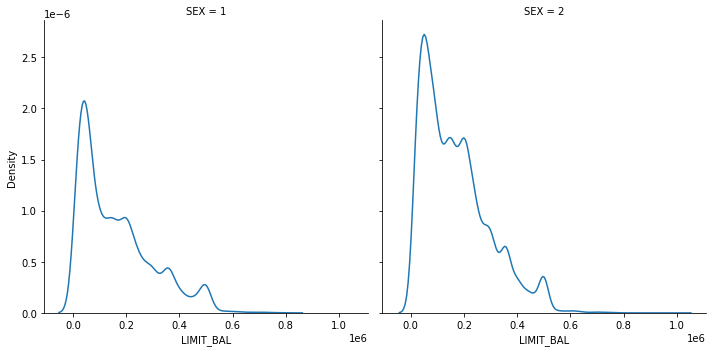

In [17]:
sns.displot(df, x="LIMIT_BAL",col='SEX',kind="kde")

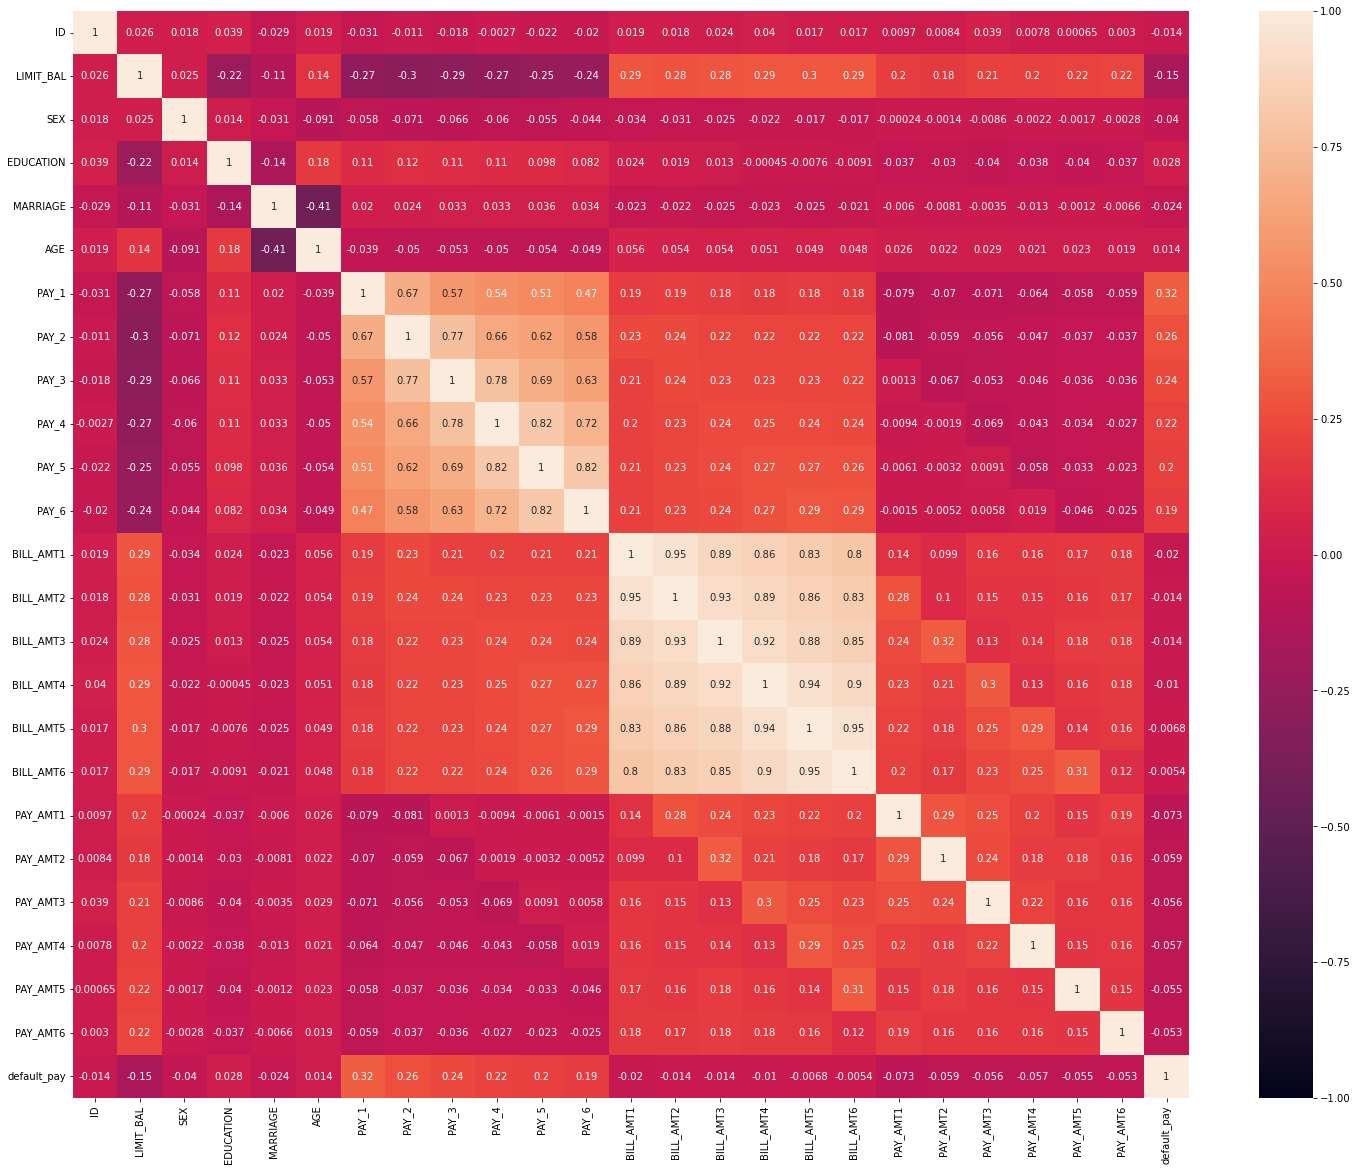

In [18]:
##Heatmap
plt.figure(figsize=(25, 20))
sns.heatmap(df.corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

# Data Preprocessing

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           30000 non-null  int64  
 1   LIMIT_BAL    30000 non-null  float64
 2   SEX          30000 non-null  int64  
 3   EDUCATION    30000 non-null  int64  
 4   MARRIAGE     30000 non-null  int64  
 5   AGE          30000 non-null  int64  
 6   PAY_1        30000 non-null  int64  
 7   PAY_2        30000 non-null  int64  
 8   PAY_3        30000 non-null  int64  
 9   PAY_4        30000 non-null  int64  
 10  PAY_5        30000 non-null  int64  
 11  PAY_6        30000 non-null  int64  
 12  BILL_AMT1    30000 non-null  float64
 13  BILL_AMT2    30000 non-null  float64
 14  BILL_AMT3    30000 non-null  float64
 15  BILL_AMT4    30000 non-null  float64
 16  BILL_AMT5    30000 non-null  float64
 17  BILL_AMT6    30000 non-null  float64
 18  PAY_AMT1     30000 non-null  float64
 19  PAY_

Text(0.5, 1.0, 'e')

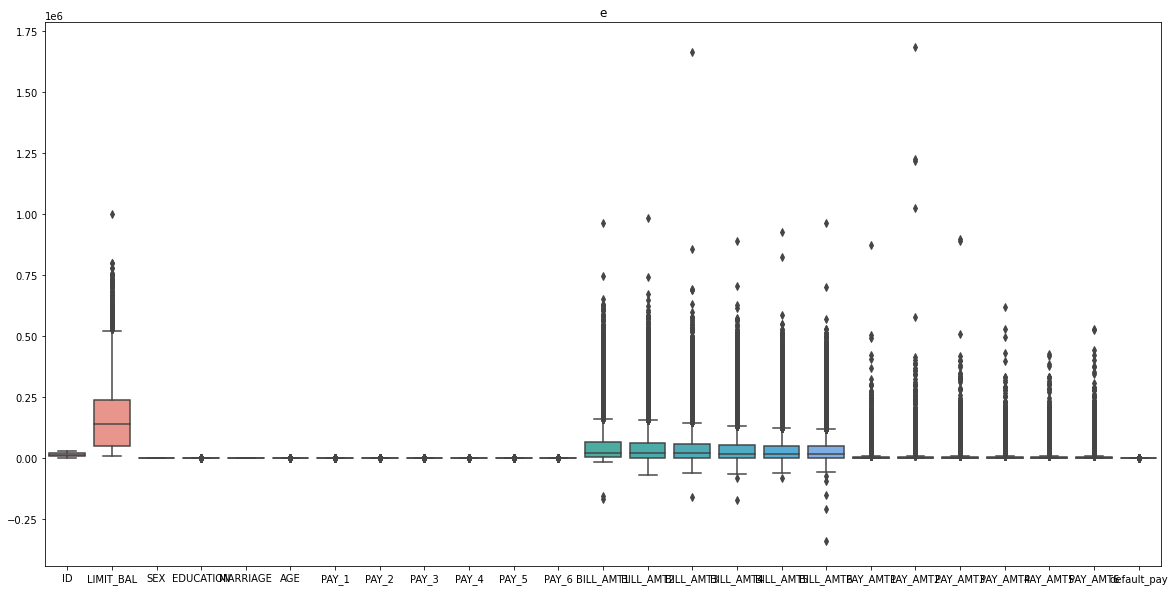

In [20]:
##Detecting outliers
from matplotlib import rcParams
rcParams['figure.figsize']=20,10
sns.boxplot(data=df)
plt.title(i[1])

In [21]:
##dropping unuseful column for model building
df=df.drop({'SEX','AGE','EDUCATION','MARRIAGE'},axis=1)

In [22]:
##Square root transformation
df=np.sqrt(df)
df=df.replace(np.nan,0)

In [23]:
##independent and dependent variable
X=df.drop('default_pay',axis=1)
y=df['default_pay']

In [24]:
y=y.values.reshape(-1,1)

In [25]:
##train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32)

In [26]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(21000, 20)
(21000, 1)
(9000, 20)
(9000, 1)


In [27]:
X_train

,ID,LIMIT_BAL,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
9077,95.278539,565.685425,0.000000,0.000000,0.0,0.0,0.0,0.000000,28.284271,137.379038,0.000000,12.247449,146.850264,69.411815,137.379038,0.000000,22.360680,146.850264,70.710678,410.477770
20142,141.926037,447.213595,0.000000,0.000000,0.0,0.0,0.0,0.000000,76.504902,74.242845,22.181073,45.144213,17.776389,35.014283,32.000000,22.181073,45.144213,0.000000,35.014283,39.774364
23741,154.084392,447.213595,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
18335,135.410487,141.421356,1.414214,1.414214,0.0,0.0,0.0,1.732051,83.066239,81.504601,88.724292,95.273291,104.828431,102.610916,0.000000,38.729833,38.729833,47.169906,0.000000,0.000000
1913,43.749286,670.820393,0.000000,0.000000,0.0,0.0,0.0,0.000000,676.481338,196.702822,67.446275,129.942295,80.249611,86.255435,31.622777,67.446275,129.942295,11.357817,31.622777,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20414,142.881069,282.842712,0.000000,0.000000,0.0,0.0,0.0,0.000000,246.635358,239.908316,243.069949,245.053055,204.345296,206.496973,45.398238,49.547957,51.643005,44.743715,45.332108,31.622777
27516,165.882489,141.421356,0.000000,0.000000,0.0,0.0,0.0,0.000000,125.670203,129.703508,133.596407,166.862219,139.111466,141.201983,36.055513,36.083237,36.331804,33.719431,31.622777,22.583180
9526,97.606352,565.685425,0.000000,0.000000,0.0,0.0,0.0,0.000000,108.092553,33.570821,44.079474,115.377641,0.000000,0.000000,33.689761,44.181444,115.650335,2.236068,0.000000,0.000000
9771,98.853427,556.776436,0.000000,0.000000,0.0,0.0,0.0,0.000000,165.193826,167.391756,176.465294,166.418148,131.673839,133.157801,38.587563,66.445466,32.924155,22.158520,23.237900,63.245553


In [28]:
X_train=X_train.replace(np.nan,0)
X_test=X_test.replace(np.nan,0)

In [29]:
X_train.head()

,ID,LIMIT_BAL,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
9077,95.278539,565.685425,0.000000,0.000000,0.0,0.0,0.0,0.000000,28.284271,137.379038,0.000000,12.247449,146.850264,69.411815,137.379038,0.000000,22.360680,146.850264,70.710678,410.477770
20142,141.926037,447.213595,0.000000,0.000000,0.0,0.0,0.0,0.000000,76.504902,74.242845,22.181073,45.144213,17.776389,35.014283,32.000000,22.181073,45.144213,0.000000,35.014283,39.774364
23741,154.084392,447.213595,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
18335,135.410487,141.421356,1.414214,1.414214,0.0,0.0,0.0,1.732051,83.066239,81.504601,88.724292,95.273291,104.828431,102.610916,0.000000,38.729833,38.729833,47.169906,0.000000,0.000000
1913,43.749286,670.820393,0.000000,0.000000,0.0,0.0,0.0,0.000000,676.481338,196.702822,67.446275,129.942295,80.249611,86.255435,31.622777,67.446275,129.942295,11.357817,31.622777,0.000000


In [30]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import  KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV,KFold, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import GridSearchCV

In [31]:
def compare_models(models):
    for model in models.values():
        model_object = model
        model_object.fit(X_train, y_train)
        y_pred = model_object.predict(X_test)
        
        print(model) 
        from sklearn import metrics
        print("score train :", model_object.score(X_test, y_test))
        print("score test :", model_object.score(X_train, y_train))
        print("mean absolute error :",metrics.mean_absolute_error(y_test, y_pred))
        print("mean squared error :",metrics.mean_squared_error(y_test, y_pred))
        print("root mean squared error :",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
        print('<----------------------------------------------------------------------------->')
        print('<----------------------------------------------------------------------------->')
    
        

In [36]:
models = {'KNN Regressor' : KNeighborsRegressor(),
          'Random Forest Regressor' : RandomForestRegressor(),
          'AdaBoost Regressor': AdaBoostRegressor(),
          'XGB Regressor' : XGBRegressor(objective = 'reg:squarederror'),
         'GradientBoostingRegressor' : GradientBoostingRegressor(),
         'LogisticRegression': LogisticRegression()
         }

In [37]:
compare_models(models)

KNeighborsRegressor()
score train : -0.04794102143821655
score test : 0.30684477603746596
mean absolute error : 0.29600000000000004
mean squared error : 0.17917333333333332
root mean squared error : 0.423288711559065
<----------------------------------------------------------------------------->
<----------------------------------------------------------------------------->
RandomForestRegressor()
score train : 0.1681168162552077
score test : 0.8861513678430823
mean absolute error : 0.27682222222222225
mean squared error : 0.1422325111111111
root mean squared error : 0.3771372576544395
<----------------------------------------------------------------------------->
<----------------------------------------------------------------------------->
AdaBoostRegressor()
score train : 0.1895700801552077
score test : 0.1960822916964724
mean absolute error : 0.2757539564472156
mean squared error : 0.13856450620891986
root mean squared error : 0.37224253680754954
<---------------------------------

In [34]:
#as we can see above logistic regression model is giving best accuracy
##Instantiating logistic regression classifier
model=LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

print(classification_report(y_pred, y_test))
print("<--------------------------------------------------------->")
print(confusion_matrix(y_pred, y_test))
print('\nAccuracy Score for model: ', accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.95      0.83      0.89      8044
         1.0       0.30      0.63      0.41       956

    accuracy                           0.81      9000
   macro avg       0.63      0.73      0.65      9000
weighted avg       0.88      0.81      0.83      9000

<--------------------------------------------------------->
[[6673 1371]
 [ 357  599]]

Accuracy Score for model:  0.808


In [35]:
# Creating the hyperparameter grid
c_space =[1,2,3,4,5,6,7,8,9]
param_grid = {'C': c_space}

# Instantiating the GridSearchCV object
reg = GridSearchCV(model,param_grid,cv=5)
reg.fit(X_train, y_train)
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(reg.best_params_))
print("Best score is {}".format(reg.best_score_))

Tuned Logistic Regression Parameters: {'C': 4}
Best score is 0.8039047619047619
